# Predicting Car Prices

In this brief exercise, I practice the basic machine learning workflow using data about cars to predict market price.

Documentation is [here](https://archive.ics.uci.edu/ml/datasets/automobile) and the dataset can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [2]:
import pandas as pd
import numpy as np

# Reading in the dataframe
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data')
cars.columns = columns # data was missing column names

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It is now possible to determine which columns qualify as possible features and which is a target.

In [4]:
# Gathering continuous numeric columns
features =  ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
cars[features].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


## Cleaning the Data
Now that columns have been added and features/target identified, the data needs to be a bit clearer for model use.

In [6]:
# Converting missing values to nan
cars = cars.replace('?', np.nan)
cars[features].head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
5,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
6,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
7,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
8,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,NaN
9,192,101.2,176.8,64.8,54.3,2395,3.50,2.80,8.8,101,5800,23,29,16430


In [7]:
# Making numeric columns... numeric
cars[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
bore                 200 non-null object
stroke               200 non-null object
compression-ratio    204 non-null float64
horsepower           202 non-null object
peak-rpm             202 non-null object
city-mpg             204 non-null int64
highway-mpg          204 non-null int64
price                200 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.4+ KB


In [8]:
# Converting...
cars[features] = cars[features].astype('float')
cars[features].isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# dropping null price values
cars[pd.isnull(cars['price'])]
price_null = [8, 43, 44, 128]
cars = cars.drop(cars.index[price_null])

In [10]:
cars[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null float64
bore                 196 non-null float64
stroke               196 non-null float64
compression-ratio    200 non-null float64
horsepower           198 non-null float64
peak-rpm             198 non-null float64
city-mpg             200 non-null float64
highway-mpg          200 non-null float64
price                200 non-null float64
dtypes: float64(14)
memory usage: 23.4 KB


In [11]:
# Replace missing values in other columns using column means.
cars[features] = cars[features].fillna(cars[features].mean())

In [12]:
cars = cars[features]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    200 non-null float64
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-null float64
peak-rpm             200 non-null float64
city-mpg             200 non-null float64
highway-mpg          200 non-null float64
price                200 non-null float64
dtypes: float64(14)
memory usage: 23.4 KB


In [13]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [14]:
# Normalizing all columns except for price
price_col = cars['price']
cars = (cars - cars/cars- cars.min())
cars['price'] = price_col

In [15]:
cars.reset_index(drop=True, inplace=True)

In [16]:
cars.iloc[0:150]

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,56.0,1.0,26.7,2.8,0.0,1059.0,-0.07,-0.39,1.00,62.000000,849.000000,7.0,10.0,16500.0
1,56.0,6.9,29.1,4.2,3.6,1334.0,-0.86,0.40,1.00,105.000000,849.000000,5.0,9.0,16500.0
2,98.0,12.2,34.5,4.9,5.5,848.0,-0.35,0.33,2.00,53.000000,1349.000000,10.0,13.0,13950.0
3,98.0,11.8,34.5,5.1,5.5,1335.0,-0.35,0.33,0.00,66.000000,1349.000000,4.0,5.0,17450.0
4,56.0,12.2,35.2,5.0,4.3,1018.0,-0.35,0.33,0.50,61.000000,1349.000000,5.0,8.0,15250.0
5,92.0,18.2,50.6,10.1,6.9,1355.0,-0.35,0.33,0.50,61.000000,1349.000000,5.0,8.0,17710.0
6,56.0,18.2,50.6,10.1,6.9,1465.0,-0.35,0.33,0.50,61.000000,1349.000000,5.0,8.0,18920.0
7,92.0,18.2,50.6,10.1,7.1,1597.0,-0.41,0.33,0.30,91.000000,1349.000000,3.0,3.0,23875.0
8,126.0,13.6,34.7,3.5,5.5,906.0,-0.04,-0.27,0.80,52.000000,1649.000000,9.0,12.0,16430.0
9,126.0,13.6,34.7,3.5,5.5,906.0,-0.04,-0.27,0.80,52.000000,1649.000000,9.0,12.0,16925.0


## Univariate Model

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    np.random.seed(1)

    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)

    # Calculating 75% of the dataframe and splitting accordingly
    train_upper_limit = int(len(df) / 2)
    train = df.iloc[0:train_upper_limit]
    test = df.iloc[train_upper_limit:]
    
    # Fitting and predicting
    knn = KNeighborsRegressor()
    knn.fit(train[[training_col]], train[target_col])
    prediction = knn.predict(test[[training_col]])
    
    # Evaluating
    mse = mean_squared_error(test[target_col], prediction)
    rmse = mse ** (1/2)
    return rmse

In [18]:
# Creating an empty dictionary to be filled with rmse values via loop/model combo
rmse_values = {}

for col in cars.columns:
    if col != 'price':
        rmse_values[col] = knn_train_test(col, 'price' , cars)

In [19]:
# Checking out rmse values for each column based on the univariate model
rmse_values

{'bore': 6226.394081231929,
 'city-mpg': 3835.348411917749,
 'compression-ratio': 7193.5885991346495,
 'curb-weight': 3433.993621135601,
 'height': 7382.791461716903,
 'highway-mpg': 3753.8291084704424,
 'horsepower': 4461.7578451995805,
 'length': 5150.4491768776825,
 'normalized-losses': 8142.0191968823065,
 'peak-rpm': 6551.49105901855,
 'stroke': 8161.142817939164,
 'wheel-base': 5443.857347028851,
 'width': 3779.2396220933124}

**Which column performed best with a default k value of 5?**

In [20]:
min(rmse_values, key=rmse_values.get)

'curb-weight'

**'curb-weight'** appears to have performed best with this model with an RMSE of 3433.99. With a different 'k' things might change.

In [21]:
# Adjusting my model to accept a k-value
def knn_train_test(training_col, target_col, k, df):
    np.random.seed(1)

    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)

    # Calculating 75% of the dataframe and splitting accordingly
    train_upper_limit = int(len(df) / 2)
    train = df.iloc[0:train_upper_limit]
    test = df.iloc[train_upper_limit:]
    
    # Fitting and predicting
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[[training_col]], train[target_col])
    prediction = knn.predict(test[[training_col]])
    
    # Evaluating
    mse = mean_squared_error(test[target_col], prediction)
    rmse = mse ** (1/2)
    return rmse

In [22]:
# Training and testing each column with k values of [1,3,5,7,9]
k_vals = [1, 3, 5, 7, 9]

rmse_values_2 = {}
col_names = []

for col in cars.columns:
    if col != 'price':
        for k in k_vals:
            if k in rmse_values_2:
                rmse_values_2[k].append(knn_train_test(col, 'price' , k, cars))
            else:
                rmse_values_2[k] = [knn_train_test(col, 'price' , k, cars)]
        col_names.append(col)


In [23]:
rmse_values_2

{1: [7326.341301768571,
  4616.855696250425,
  6487.558139238522,
  5713.616311059048,
  10805.760867703857,
  4390.877922466076,
  5926.514010782393,
  6674.97957524965,
  7344.202947903877,
  4181.732632534031,
  8792.216444674234,
  4170.034286429789,
  3667.7066335790814],
 3: [6963.801098857179,
  5336.092746257947,
  6133.4055774730705,
  4163.678148651208,
  7810.777692038381,
  3680.286562816059,
  5927.911351770069,
  6907.209119141793,
  5943.417906577177,
  4166.862616192454,
  7069.92400092737,
  3461.6351235924462,
  3602.203269913814],
 5: [8142.0191968823065,
  5443.857347028851,
  5150.4491768776825,
  3779.2396220933124,
  7382.791461716903,
  3433.993621135601,
  6226.394081231929,
  8161.142817939164,
  7193.5885991346495,
  4461.7578451995805,
  6551.49105901855,
  3835.348411917749,
  3753.8291084704424],
 7: [7680.332297604879,
  5509.9977571942545,
  4980.95926575824,
  3638.228153194062,
  7276.571652578022,
  3174.0695108639184,
  6292.4065261071555,
  8634.907

## Plotting the RMSE values

In [68]:
# creating a dataframe out of the rmse/k val dictionary for plotting
rmse_df = pd.DataFrame.from_dict(rmse_values_2, orient='index')
rmse_df.columns = col_names
rmse_df = rmse_df.sort_index(axis=0)

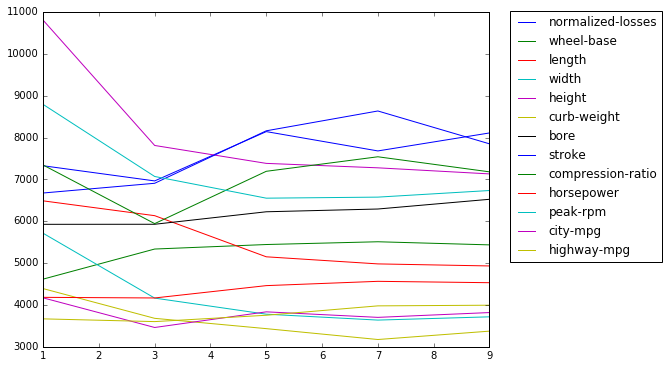

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

for col in rmse_df:
    plt.plot(rmse_df.index, rmse_df[col], label=col)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.02))
plt.show()

In the lower areas of the plot we see 'curb-weight', 'city-mpg', 'highway-mpg' and 'peak-rpm' (near the higher k values). Indicating that mileage and the weight of the car (without occupants) can be elements that determine a cars price. 

## Multivariate Model (Default k)
I will now modify my previous model to accept multiple columns from the dataframe instead of just one. 

In [26]:
# Adjusting my model to accept multiple variables
def knn_train_test(training_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    rmse_vals = []
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)

    # Calculating 75% of the dataframe and splitting accordingly
    train_upper_limit = int(len(df) / 2)
    train = df.iloc[0:train_upper_limit]
    test = df.iloc[train_upper_limit:]
    
    # Fitting and predicting
    for col in training_cols:
        knn.fit(train[[col]], train[target_col])
        prediction = knn.predict(test[[col]])
    
        # Evaluating
        mse = mean_squared_error(test[target_col], prediction)
        rmse = mse ** (1/2)
        rmse_vals.append(rmse)
        avg_rmse = np.mean(rmse_vals)
    return avg_rmse

In [27]:
rmse_df.min(axis=0).sort_values()

curb-weight          3174.069511
city-mpg             3461.635124
highway-mpg          3602.203270
width                3638.228153
horsepower           4166.862616
wheel-base           4616.855696
length               4931.887957
bore                 5926.514011
compression-ratio    5943.417907
peak-rpm             6551.491059
stroke               6674.979575
normalized-losses    6963.801099
height               7131.412660
dtype: float64

We can get a good idea of our performers short list based on this view of the minimum values. We will use them to train and test with the default k value of 5.

In [28]:
top_2 = ['curb-weight', 'city-mpg']
top_3 = ['curb-weight', 'city-mpg', 'highway-mpg']
top_4 = ['curb-weight', 'city-mpg', 'highway-mpg', 'width']
top_5 = ['curb-weight', 'city-mpg', 'highway-mpg', 'width', 'horsepower']
tops = [top_2, top_3, top_4, top_5]

In [29]:
rmse_shortlist = {}
for ls in tops:
    avg_rmse_val = knn_train_test(ls, 'price', cars)
    rmse_shortlist['top ' + str(len(ls))] = avg_rmse_val

In [30]:
rmse_shortlist

{'top 2': 3634.671016526675,
 'top 3': 3674.3903805079303,
 'top 4': 3700.6026909042757,
 'top 5': 3852.8337217633366}

## Multivariate Model (Multiple k values)

In [31]:
# Adjusting my model to accept multiple variables and multiple k values
def knn_train_test(training_cols, target_col, k, df):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    rmse_vals = []
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)

    # Calculating 75% of the dataframe and splitting accordingly
    train_upper_limit = int(len(df) / 2)
    train = df.iloc[0:train_upper_limit]
    test = df.iloc[train_upper_limit:]
    
    # Fitting and predicting
    for col in training_cols:
        knn.fit(train[[col]], train[target_col])
        prediction = knn.predict(test[[col]])
    
        # Evaluating
        mse = mean_squared_error(test[target_col], prediction)
        rmse = mse ** (1/2)
    return rmse

In [34]:
# Creating a dictionary with the top 3 top categories (a mouthful) and 25 k variations of RMSE
multi_k = {}

for ls in tops[0:3]:
    for i in range(1, 26):
        key = 'top ' + str(len(ls))
        rmse_val = knn_train_test(ls, 'price', i, cars)
        if key not in multi_k:
            multi_k[key] = [rmse_val]
            #multi_k[key] = ["k=" + str(i) + ": " + str(rmse_val)]
        else:
            multi_k[key].append(rmse_val)
            #multi_k[key].append("k="+ str(i) + ": " + str(rmse_val))

In [74]:
top_rmse_df = pd.DataFrame.from_dict(multi_k, orient='index')
top_rmse_df.columns = list(range(1, 26))
top_rmse_df = top_rmse_df.transpose()

In [75]:
rmse_df

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
1,7326.341302,4616.855696,6487.558139,5713.616311,10805.760868,4390.877922,5926.514011,6674.979575,7344.202948,4181.732633,8792.216445,4170.034286,3667.706634
3,6963.801099,5336.092746,6133.405577,4163.678149,7810.777692,3680.286563,5927.911352,6907.209119,5943.417907,4166.862616,7069.924001,3461.635124,3602.203270
5,8142.019197,5443.857347,5150.449177,3779.239622,7382.791462,3433.993621,6226.394081,8161.142818,7193.588599,4461.757845,6551.491059,3835.348412,3753.829108
7,7680.332298,5509.997757,4980.959266,3638.228153,7276.571653,3174.069511,6292.406526,8634.907610,7540.580428,4564.400853,6576.424503,3703.325285,3978.171037
9,8109.837609,5435.529878,4931.887957,3716.199959,7131.412660,3374.022000,6524.612385,7850.010944,7180.410829,4531.656272,6734.391683,3818.324132,3993.656165


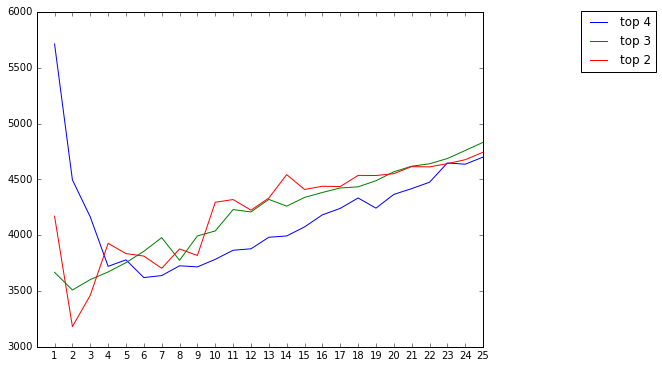

In [78]:
# for col in rmse_df:
    # plt.plot(rmse_df.index, rmse_df[col], label=col)

for col in top_rmse_df:
    plt.plot(top_rmse_df.index, top_rmse_df[col], label=col)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.02))
plt.xticks(np.arange(1, 26, step=1))
plt.show()

In [81]:
# Finding the lowest rmses in each row
top_rmse_df.min()

top 4    3620.259446
top 3    3508.946668
top 2    3181.351049
dtype: float64

**The ideal k-values for each group (also supported by the plot) were as follows**:

In [93]:
# Finding the k-values for the minimum values
top_rmse_df.idxmin(axis=0)

top 4    6
top 3    2
top 2    2
dtype: int64